# Clonamos el repositorio para obtener los dataSet

In [185]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 39.29 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [234]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [235]:
session = tf.Session()

# Predicción de la Longitud de Pétalo de Iris

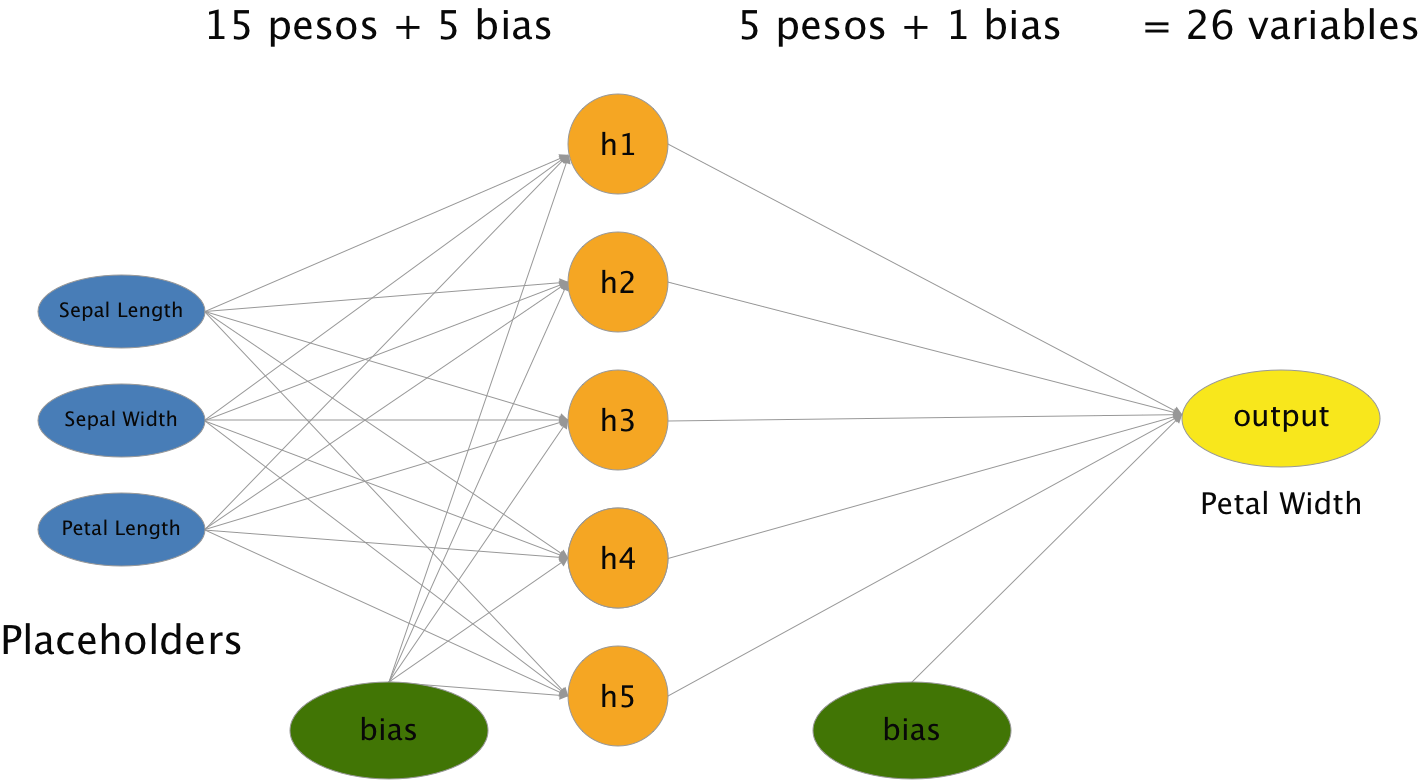

In [236]:
from IPython.display import Image
Image('/content/tensorflow/resources/08-nn.png')

In [237]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [238]:
iris =datasets.load_iris()

In [239]:
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [240]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

In [241]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [242]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [243]:
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [244]:
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

In [245]:
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)

In [246]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [247]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_ouput = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [248]:
loss = tf.reduce_mean(tf.square(y_target-final_ouput))

In [249]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [250]:
init = tf.global_variables_initializer()
session.run(init)

In [251]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss))
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test))
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", Loss = "+str(temp_loss))

Paso #50, Loss = 2.3847997
Paso #100, Loss = 1.9423999
Paso #150, Loss = 2.0942
Paso #200, Loss = 1.8522
Paso #250, Loss = 2.3314
Paso #300, Loss = 2.0997999
Paso #350, Loss = 1.8206
Paso #400, Loss = 2.1162
Paso #450, Loss = 1.9732001
Paso #500, Loss = 2.5791998


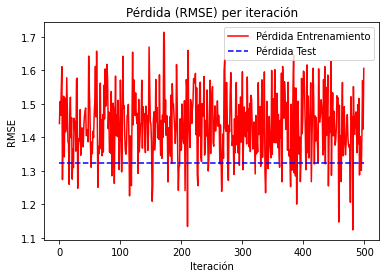

In [252]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()

In [253]:
print(session.run(A1))

[[ 0.4933801   0.9256559   0.2092464   0.01278721 -1.2922066 ]
 [ 0.19666782 -0.9302149   0.13183357  0.5599647  -1.7304003 ]
 [ 2.2500033  -1.2197697  -0.7175749  -0.630914    0.09542864]]


In [254]:
print(session.run(b1))

[-1.0779719   0.91754377  0.49420866  1.237811    0.8399823 ]


In [255]:
print(session.run(A2))

[[ 0.22069912]
 [-0.5602939 ]
 [-0.06470904]
 [ 0.40529314]
 [ 0.25941914]]


In [256]:
print(session.run(b2))

[-1.2179888]
